In [1]:
%load_ext autoreload
%autoreload 2

# Dev script for calculating gradients in ECCO using xgcm

In [30]:
import numpy as np
import xarray as xr
from xgcm import Grid
import glob
import matplotlib.pyplot as plt

In [31]:
rootdir = '/data2/project/ECCO4v4/'

In [32]:
# shortwave
localdir = 'nctiles_monthly/MXLDEPTH/*/'
filename = 'MXLDEPTH_*.nc'
v = xr.open_mfdataset(rootdir+localdir+filename)
v = v.rename({'tile':'face'}).drop(['XC','YC','timestep','time_bnds'])

In [33]:
rootdir = '/home/gmacgilchrist/data/ECCO/'
filename = 'ECCO-GRID.nc'
grid = xr.open_dataset(rootdir+filename)
grid = grid.rename({'tile':'face'})
# def preprocess(ds):
#     dsnew = ds.copy()
#     dsnew = dsnew.expand_dims({'face':[int(ds.encoding["source"][41:45])]})
#     return dsnew
# localdir = 'nctiles_grid/'
# filename = 'GRID.*.nc'
# grid = xr.open_mfdataset(rootdir+localdir+filename, preprocess=preprocess)
# grid = grid.rename({'i1':'k','i2':'j','i3':'i'})
grid

<xarray.Dataset>
Dimensions:  (face: 13, i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50)
Coordinates:
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC       (face, j, i) float32 ...
    YC       (face, j, i) float32 ...
    XG       (face, j_g, i_g) float32 ...
    YG       (face, j_g, i_g) float32 ...
    CS       (face, j, i) float32 ...
    SN       (face, j, i) float32 ...
    Zl       (k_l) float32 ...
    Zu       (k_u) float32 ...
    Z        (k) float32 ...
    Zp1      (k_p1) float32 ...
    dxC      (face, j, i_g) float32 ...
    rAs      (face, j_g, i) float32 ...
    rAw      (face, j, i_g) float32 ...
    Depth    (face, j, i) float32 ...
    rA       (face, j, i) float32 ...
    dxG      (face, j_g, i) float32 ...
    dyG      (face, j, i_g) float32 ...
    rAz      (face, j_g, i_g) float32 ...
    dyC      (face, j_g, i) float32 ...
    PHrefC   (k) float32 ...
    drC      (k_p1) float32 ...
    PHrefF   (k_p1) float32 ...
    drF      (k) float32 ...
    hFacS    (k, face, j_g, i) float32 ...
    hFacC    (k, face, j, i) float32 ...
    hFacW    (k, face, j, i_g) float32 ...
    maskW    (k, face, j, i_g) bool ...
    maskC    (k, face, j, i) bool ...
    maskS    (k, face, j_g, i) bool ...
Data variables:
    *empty*
Attributes:
    date_created:  Mon Dec 30 11:13:26 2019
    title:         ECCOv4 MITgcm grid information

In [34]:
ds = xr.merge([v,grid])
ds

,Array,Chunk
Bytes,131.41 MB,421.20 kB
Shape,"(312, 13, 90, 90)","(1, 13, 90, 90)"
Count,936 Tasks,312 Chunks
Type,float32,numpy.ndarray


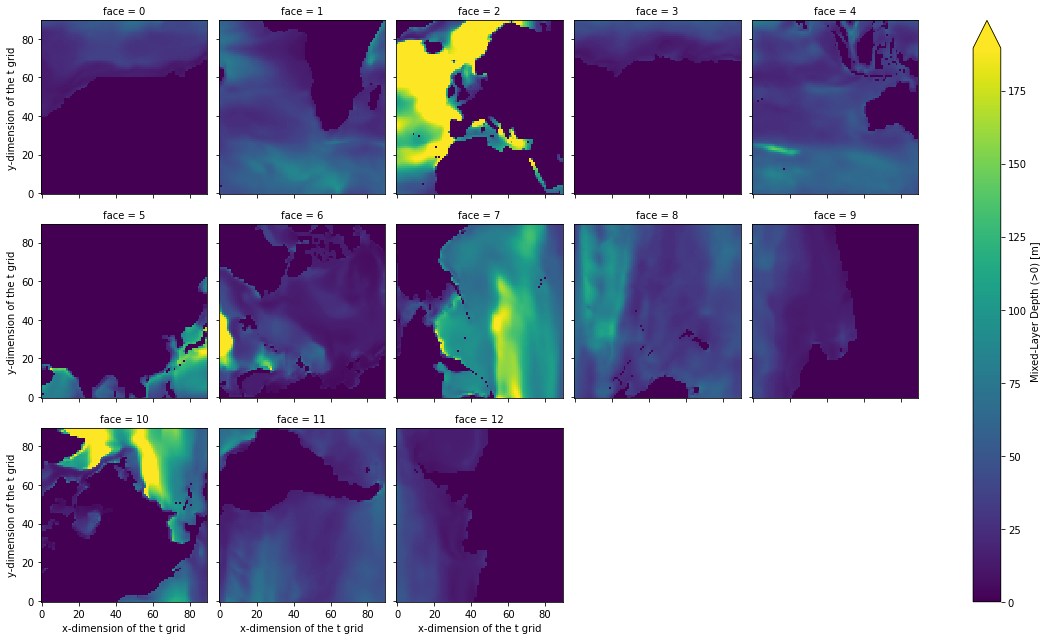

In [35]:
ds['MXLDEPTH'].isel(time=0).plot(col='face', col_wrap=5, robust = True)

In [36]:
# define the connectivity between faces
face_connections = {'face':
                    {0: {'X':  ((12, 'Y', False), (3, 'X', False)),
                         'Y':  (None,             (1, 'Y', False))},
                     1: {'X':  ((11, 'Y', False), (4, 'X', False)),
                         'Y':  ((0, 'Y', False),  (2, 'Y', False))},
                     2: {'X':  ((10, 'Y', False), (5, 'X', False)),
                         'Y':  ((1, 'Y', False),  (6, 'X', False))},
                     3: {'X':  ((0, 'X', False),  (9, 'Y', False)),
                         'Y':  (None,             (4, 'Y', False))},
                     4: {'X':  ((1, 'X', False),  (8, 'Y', False)),
                         'Y':  ((3, 'Y', False),  (5, 'Y', False))},
                     5: {'X':  ((2, 'X', False),  (7, 'Y', False)),
                         'Y':  ((4, 'Y', False),  (6, 'Y', False))},
                     6: {'X':  ((2, 'Y', False),  (7, 'X', False)),
                         'Y':  ((5, 'Y', False),  (10, 'X', False))},
                     7: {'X':  ((6, 'X', False),  (8, 'X', False)),
                         'Y':  ((5, 'X', False),  (10, 'Y', False))},
                     8: {'X':  ((7, 'X', False),  (9, 'X', False)),
                         'Y':  ((4, 'X', False),  (11, 'Y', False))},
                     9: {'X':  ((8, 'X', False),  None),
                         'Y':  ((3, 'X', False),  (12, 'Y', False))},
                     10: {'X': ((6, 'Y', False),  (11, 'X', False)),
                          'Y': ((7, 'Y', False),  (2, 'X', False))},
                     11: {'X': ((10, 'X', False), (12, 'X', False)),
                          'Y': ((8, 'Y', False),  (1, 'X', False))},
                     12: {'X': ((11, 'X', False), None),
                          'Y': ((9, 'Y', False),  (0, 'X', False))}}}


# ds['DRW'] = ds.hFacW * ds.DRF #vertical cell size at u point
# ds['DRS'] = ds.hFacS * ds.DRF #vertical cell size at v point
# ds['DRC'] = ds.hFacC * ds.DRF #vertical cell size at tracer point

# metrics = {
#     ('X',): ['DXC', 'DXG'], # X distances
#     ('Y',): ['DYC', 'DYG'], # Y distances
#     ('Z',): ['DRW', 'DRS', 'DRC'], # Z distances
#     ('X', 'Y'): ['RAC', 'RAZ', 'RC', 'RF'] # Areas
# }

# create the grid object
# xgrid = Grid(ds, periodic=False, face_connections=face_connections, metrics=metrics)
xgrid = Grid(ds, face_connections=face_connections)
xgrid

<xgcm.Grid>
Y Axis (periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center
Z Axis (periodic, boundary=None):
  * center   k --> left
  * left     k_l --> center
  * outer    k_p1 --> center
  * right    k_u --> center
X Axis (periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center
T Axis (periodic, boundary=None):
  * center   time

In [37]:
# Calculate gradients in field
gx = xgrid.interp(ds['MXLDEPTH'], 'X')
gy = xgrid.interp(ds['MXLDEPTH'], 'Y', boundary='fill')
dg = xgrid.diff_2d_vector({'X':gx,'Y':gy},boundary='fill')
dg
# dgdx = xgrid.diff(gxg, 'X')

{'X': <xarray.DataArray 'sub-3eac8441fbd431ed5462be2a0e61d434' (time: 312, face: 13, j: 90, i: 90)>
 dask.array<sub, shape=(312, 13, 90, 90), dtype=float32, chunksize=(1, 1, 90, 88), chunktype=numpy.ndarray>
 Coordinates:
   * time     (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
   * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
   * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
   * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89,
 'Y': <xarray.DataArray 'sub-b75814a6398f50cd65f4b797c7707a28' (time: 312, face: 13, j: 90, i: 90)>
 dask.array<sub, shape=(312, 13, 90, 90), dtype=float32, chunksize=(1, 1, 88, 90), chunktype=numpy.ndarray>
 Coordinates:
   * time     (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
   * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
   * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
   * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 8

In [38]:
D = xgrid.interp_2d_vector({'X':ds['dxC'],'Y':ds['dyC']},boundary='fill')

In [39]:
dgdx = dg['X']/D['X']
dgdx

,Array,Chunk
Bytes,131.41 MB,31.68 kB
Shape,"(312, 13, 90, 90)","(1, 1, 90, 88)"
Count,218791 Tasks,12168 Chunks
Type,float32,numpy.ndarray


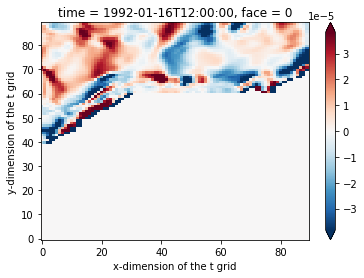

In [41]:
dgdx.isel(time=0,face=0).plot(robust = True)

In [42]:
dsnew = ds.isel(face=0).squeeze()
gridnew = grid.isel(face=0).squeeze()
dsnew = xr.merge([dsnew,gridnew])

In [43]:
metrics = {
    ('X',): ['dxC', 'dxG'], # X distances
    ('Y',): ['dyC', 'dyG'], # Y distances
#     ('Z',): ['DRW', 'DRS', 'DRC'], # Z distances
#     ('X', 'Y'): ['RAC', 'RAZ', 'RC', 'RF'] # Areas
}
xgridnew = Grid(dsnew,metrics=metrics)

In [54]:
dgdxnew = xgridnew.derivative(dsnew['MXLDEPTH'],'X',boundary='extend')
dgdxnew = xgridnew.interp(dgdxnew,['X'],boundary='extend')

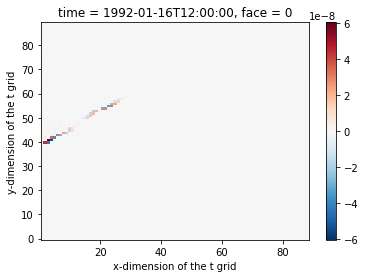

In [60]:
(dgdx.isel(time=0,face=0) - dgdxnew.isel(time=0)).isel(i=slice(1,-1)).plot()

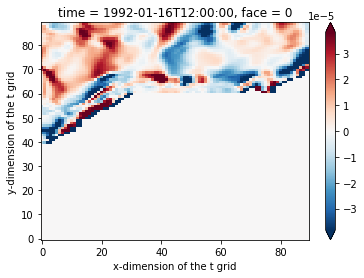

In [58]:
dgdx.isel(time=0,face=0).plot(robust=True)

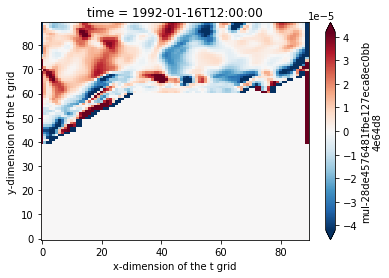

In [59]:
dgdxnew.isel(time=0).plot(robust=True)